<a href="https://colab.research.google.com/github/Thomasjoseph2/gold_price_predictor_ml/blob/main/gold_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [ ]:
#loading the csv to pandas
gold_data=pd.read_csv('/content/gld_price_data.csv')


In [ ]:
# Print  first 5 rows in the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and colums
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting the statitical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
  1:Positive correlation
  2:Negative correlaion

In [ ]:
# Convert the date column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation calculation
numerical_data = gold_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numerical_data.corr()

print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

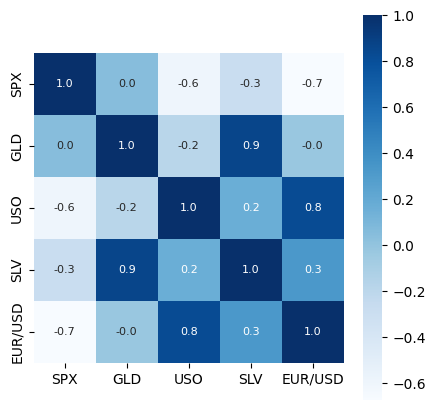

In [ ]:
#constructing a heat map
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-20-274dd60d1269>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

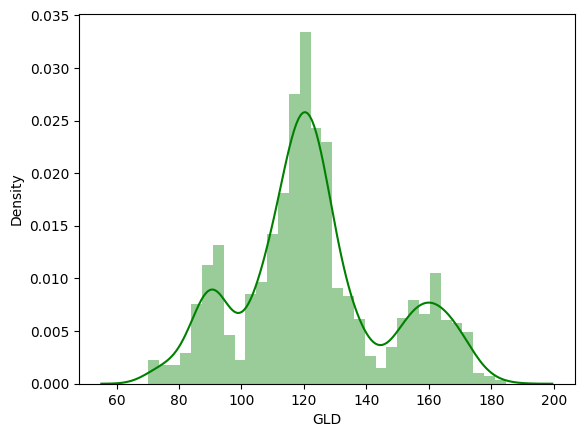

In [ ]:
#checking distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

Splittimg the features and Target

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training :random foreat algoritham

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.5147991   81.9116999  116.11360015 127.68700093 120.70950141
 154.80539764 149.71939801 126.09070014 117.44359892 126.02540078
 116.94530053 171.2093005  141.40079795 167.93239851 115.23380002
 117.76090053 139.70370347 169.93030123 159.70160334 157.25009967
 155.13530006 125.26210007 176.85449928 157.06160325 125.25280037
  93.68209984  76.84380024 120.80130015 119.07869918 167.43249946
  88.13830024 125.15280024  91.05740069 117.67960028 121.16449889
 136.38700094 115.54020118 115.45490071 148.7942998  107.24290076
 104.40990263  87.24889811 126.53440068 117.96919995 152.93629931
 119.57570005 108.28690017 108.20929814  93.19050042 127.15289743
  75.10160024 113.6737991  121.18240029 111.31589928 118.92389926
 120.97699931 159.36220054 167.31850144 146.91449642  85.7580984
  94.50890021  86.84069872  90.6702004  119.01050082 126.46040091
 127.44239998 170.14190084 122.28009959 117.33179888  99.18000081
 168.73900181 143.16379782 131.99130228 121.25820218 121.08859964
 119.734500

In [ ]:
from logging import error
#r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9887764655698269


Compare actual values and predicted values

In [ ]:
Y_test=list(Y_test)

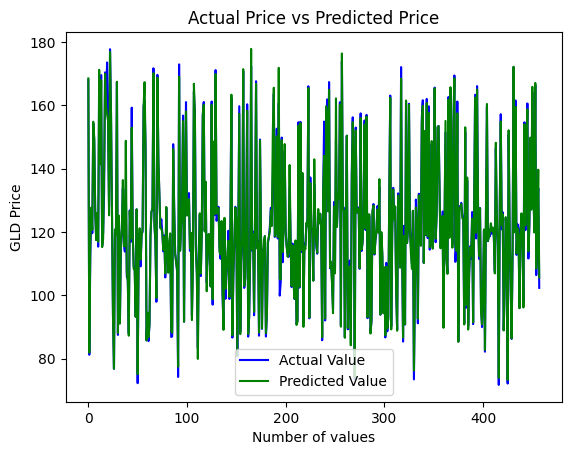

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()